This is a simple demonstration of how to calculate ERP from raw EEG data in python
created by Natalia Zaretskaya 2023.04.27

In [1]:
# import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import csv
import pandas as pd

In [5]:
# read in the file
# file = '/Users/natalia/Music/Spike Recorder/BYB_Recording_2023-04-25_09.22.01.wav'
file = 'C:\Users\zaretska\Nextcloud\current\jupyter\BYB_Recording_2023-04-25_09.22.01.wav'
fs, data = waves.read(file)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3968368585.py, line 3)

In [4]:
# resample data to 500 Hz
length_data=np.shape(data)
length_new=length_data[0]*0.05
ld_int=int(length_new)
from scipy import signal
data_new=signal.resample(data,ld_int)

NameError: name 'data' is not defined

Text(0.5, 0, 'Time [s]')

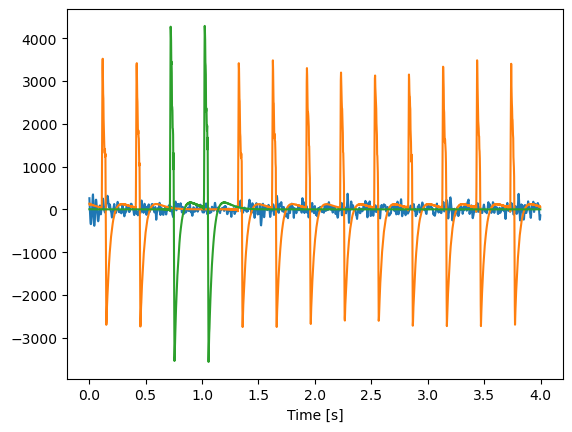

In [4]:
# plot the first 2000 samples 
# you shuld see the events (in this case oddball sounds)
# in green
t=np.arange(0, ld_int)*1/500
plt.figure('Data')
plt.plot(t[1:2000], data_new[1:2000])
plt.xlabel('Time [s]')
#plt.xlim(0,max(t))

Text(0.5, 0, 'Time [s]')

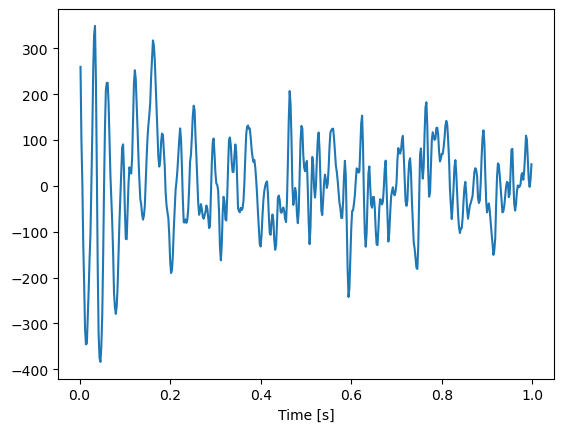

In [5]:
# plot the first 1 second of raw EEG data, just to know what it looks like
plt.figure('Data')
plt.plot(t[1:500], data_new[1:500,0])
plt.xlabel('Time [s]')

In [ ]:
# lowpass-filter the raw signal
from scipy.signal import butter, filtfilt

# Define filter parameters
fc = 5 # Cutoff frequency (Hz)
order = 2 # Filter order

# define the signal variable
signal = data_new[:,0]
# Create the filter coefficients using a Butterworth filter
b, a = butter(order, fc/(fs/2), btype='low')

# Apply the filter using filtfilt to avoid phase distortion
filtered_signal = filtfilt(b, a, signal)

# plot the original and filtered signals
fig, ax = plt.subplots()
ax.plot(t, signal, label='Original signal')
ax.plot(t, filtered_signal, label='Filtered signal')
ax.legend()
plt.show()

Text(0.5, 0, 'Time [s]')

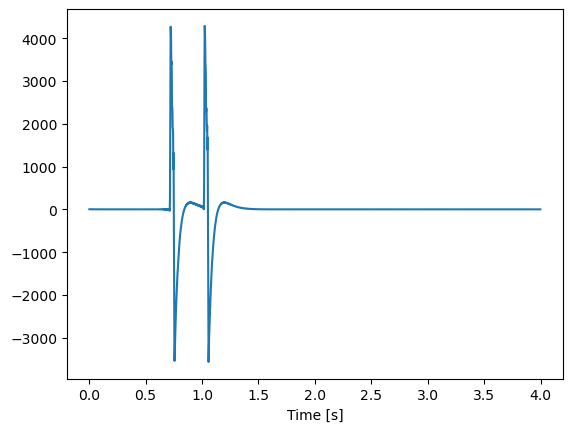

In [6]:
# identify the column of the array where the beeps are stored
beep_signal = data_new[0:ld_int,2]
plt.plot(t[1:2000], beep_signal[1:2000])
plt.xlabel('Time [s]')

In [7]:
# find the indices of the beep events
event_indices = np.where(beep_signal > 1000)
event_indices = event_indices[0]
event_onset_indices = np.where(np.diff(event_indices) >10)
event_onset_indices = event_onset_indices[0]
final_event_indices = event_indices[event_onset_indices]
final_event_indices

array([  374,   525,  3241,  4448,  4900,  5353,  6108,  6258,  6560,
        9879, 11690, 11841, 12746, 14557, 16518, 16820, 17424, 17876,
       18178, 19536, 19837, 21648, 23006])

Text(0.5, 0, 'Time [s]')

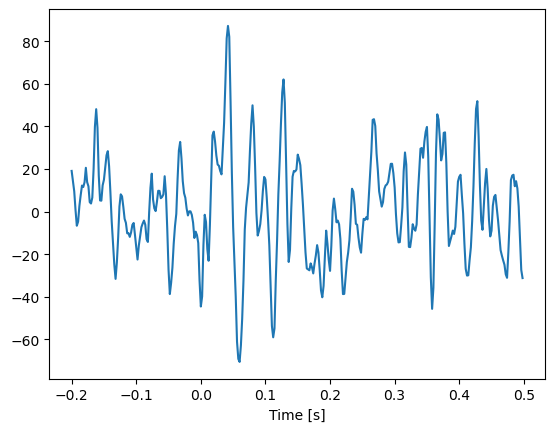

In [57]:
# now we have to do a time-locked average to produce an ERP
# define the time window in seconds around the event onset
window_seconds = np.array([-0.2, 0.5])
window_samples = 500*window_seconds
window_samples = np.round(window_seconds*500).astype(int)

# loop over events, stack them on top of each other
segments = []
for index in final_event_indices:
    segment_start = index + window_samples[0]
    segment_end = index + window_samples[1]
    segment = data_new[segment_start:segment_end,0]
    segments.append(segment)

# average to get an ERP
erp = np.mean(segments,0)
erp_time = np.arange(window_samples[0]/500, window_samples[1]/500, 1/500)
plt.plot(erp_time, erp)
plt.xlabel('Time [s]')
ax.axvline(x=0, color='r', linestyle='--')

In [ ]:
# TODO: 
# Filter the signal with a lowpass of 30 hz